### Time Series Clustering using TSFresh +KMeans

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# optional - suppress warnings

import warnings
warnings.filterwarnings("ignore")

### Load data

In [21]:
df_pivoted = pd.read_csv('./data/df_pivoted.zip', low_memory=False)
print(df_pivoted.shape, df_pivoted.columns)
df_pivoted.head()

(4605, 375) Index(['StockCode', '2009-12-01 00:00:00', '2009-12-02 00:00:00',
       '2009-12-03 00:00:00', '2009-12-04 00:00:00', '2009-12-05 00:00:00',
       '2009-12-06 00:00:00', '2009-12-07 00:00:00', '2009-12-08 00:00:00',
       '2009-12-09 00:00:00',
       ...
       '2010-11-30 00:00:00', '2010-12-01 00:00:00', '2010-12-02 00:00:00',
       '2010-12-03 00:00:00', '2010-12-04 00:00:00', '2010-12-05 00:00:00',
       '2010-12-06 00:00:00', '2010-12-07 00:00:00', '2010-12-08 00:00:00',
       '2010-12-09 00:00:00'],
      dtype='object', length=375)


,StockCode,2009-12-01 00:00:00,2009-12-02 00:00:00,2009-12-03 00:00:00,2009-12-04 00:00:00,2009-12-05 00:00:00,2009-12-06 00:00:00,2009-12-07 00:00:00,2009-12-08 00:00:00,2009-12-09 00:00:00,...,2010-11-30 00:00:00,2010-12-01 00:00:00,2010-12-02 00:00:00,2010-12-03 00:00:00,2010-12-04 00:00:00,2010-12-05 00:00:00,2010-12-06 00:00:00,2010-12-07 00:00:00,2010-12-08 00:00:00,2010-12-09 00:00:00
0,10002,12.0,0.0,7.0,73.0,0.0,49.0,2.0,12.0,0.0,...,12.0,60.0,1.0,8.0,0.0,1.0,25.0,8.0,13.0,44.0
1,10080,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10109,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10120,60.0,10.0,0.0,30.0,0.0,0.0,0.0,1.0,1.0,...,10.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,0.0
4,10125,5.0,0.0,0.0,46.0,0.0,8.0,20.0,1.0,22.0,...,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,40.0,0.0


In [22]:
# transpose data to match format neeed for further processing
df_final = df_pivoted.melt(id_vars=['StockCode'], var_name='timestamp', value_name='target_value')
print(df_final.shape, df_final.columns)

df_final.head()

(1722270, 3) Index(['StockCode', 'timestamp', 'target_value'], dtype='object')


,StockCode,timestamp,target_value
0,10002,2009-12-01 00:00:00,12.0
1,10080,2009-12-01 00:00:00,0.0
2,10109,2009-12-01 00:00:00,0.0
3,10120,2009-12-01 00:00:00,60.0
4,10125,2009-12-01 00:00:00,5.0


### TSFresh

In [6]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 KB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 110.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:


      Successfully uninstalled protobuf-3.19.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [23]:
from tsfresh import extract_features
extracted_features = extract_features(df_final, column_id="StockCode", column_sort="timestamp")

Feature Extraction: 100%|██████████| 40/40 [01:14<00:00,  1.85s/it]


In [34]:
print(extracted_features.shape, extracted_features.columns)
extracted_features.head()

(4605, 789) Index(['target_value__variance_larger_than_standard_deviation',
       'target_value__has_duplicate_max', 'target_value__has_duplicate_min',
       'target_value__has_duplicate', 'target_value__sum_values',
       'target_value__abs_energy', 'target_value__mean_abs_change',
       'target_value__mean_change',
       'target_value__mean_second_derivative_central', 'target_value__median',
       ...
       'target_value__permutation_entropy__dimension_6__tau_1',
       'target_value__permutation_entropy__dimension_7__tau_1',
       'target_value__query_similarity_count__query_None__threshold_0.0',
       'target_value__matrix_profile__feature_"min"__threshold_0.98',
       'target_value__matrix_profile__feature_"max"__threshold_0.98',
       'target_value__matrix_profile__feature_"mean"__threshold_0.98',
       'target_value__matrix_profile__feature_"median"__threshold_0.98',
       'target_value__matrix_profile__feature_"25"__threshold_0.98',
       'target_value__matrix_pro

,target_value__variance_larger_than_standard_deviation,target_value__has_duplicate_max,target_value__has_duplicate_min,target_value__has_duplicate,target_value__sum_values,target_value__abs_energy,target_value__mean_abs_change,target_value__mean_change,target_value__mean_second_derivative_central,target_value__median,...,target_value__permutation_entropy__dimension_6__tau_1,target_value__permutation_entropy__dimension_7__tau_1,target_value__query_similarity_count__query_None__threshold_0.0,"target_value__matrix_profile__feature_""min""__threshold_0.98","target_value__matrix_profile__feature_""max""__threshold_0.98","target_value__matrix_profile__feature_""mean""__threshold_0.98","target_value__matrix_profile__feature_""median""__threshold_0.98","target_value__matrix_profile__feature_""25""__threshold_0.98","target_value__matrix_profile__feature_""75""__threshold_0.98",target_value__mean_n_absolute_max__number_of_maxima_7
10002,1.0,0.0,0.0,1.0,6753.0,1246425.0,29.731903,0.085791,0.057796,0.0,...,4.662470,5.267111,NaN,1.156394,6.322159,3.359248,3.319631,2.769635,4.002091,338.571429
10002R,0.0,0.0,1.0,1.0,4.0,6.0,0.021448,0.000000,-0.001344,0.0,...,0.195072,0.229094,NaN,3.403340,10.392305,9.608496,10.392305,10.392305,10.392305,0.571429
10080,1.0,0.0,1.0,1.0,102.0,8148.0,0.546917,0.000000,-0.001344,0.0,...,0.358621,0.418636,NaN,3.296090,20.249251,16.705905,19.570023,18.547708,20.140483,14.571429
10109,0.0,0.0,0.0,1.0,0.0,32.0,0.042895,0.000000,0.000000,0.0,...,0.149591,0.168646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.142857
10120,1.0,0.0,0.0,1.0,-8543.0,81014083.0,50.504021,-0.160858,0.051075,0.0,...,1.763682,2.045770,NaN,7.667704,13.634972,10.415854,10.383684,9.674647,10.782501,1316.000000


In [84]:
extracted_features_cleaned=extracted_features#.reset_index(drop=True)
extracted_features_cleaned=extracted_features_cleaned.dropna(axis=1)
extracted_features_cleaned

,target_value__variance_larger_than_standard_deviation,target_value__has_duplicate_max,target_value__has_duplicate_min,target_value__has_duplicate,target_value__sum_values,target_value__abs_energy,target_value__mean_abs_change,target_value__mean_change,target_value__mean_second_derivative_central,target_value__median,...,target_value__lempel_ziv_complexity__bins_3,target_value__lempel_ziv_complexity__bins_5,target_value__lempel_ziv_complexity__bins_10,target_value__lempel_ziv_complexity__bins_100,target_value__permutation_entropy__dimension_3__tau_1,target_value__permutation_entropy__dimension_4__tau_1,target_value__permutation_entropy__dimension_5__tau_1,target_value__permutation_entropy__dimension_6__tau_1,target_value__permutation_entropy__dimension_7__tau_1,target_value__mean_n_absolute_max__number_of_maxima_7
10002,1.0,0.0,0.0,1.0,6753.0,1246425.0,29.731903,0.085791,0.057796,0.0,...,0.141711,0.117647,0.229947,0.323529,1.587381,2.682183,3.783314,4.662470,5.267111,338.571429
10002R,0.0,0.0,1.0,1.0,4.0,6.0,0.021448,0.000000,-0.001344,0.0,...,0.077540,0.077540,0.077540,0.077540,0.093745,0.127398,0.161174,0.195072,0.229094,0.571429
10080,1.0,0.0,1.0,1.0,102.0,8148.0,0.546917,0.000000,-0.001344,0.0,...,0.072193,0.072193,0.072193,0.080214,0.172133,0.239002,0.298743,0.358621,0.418636,14.571429
10109,0.0,0.0,0.0,1.0,0.0,32.0,0.042895,0.000000,0.000000,0.0,...,0.074866,0.074866,0.074866,0.074866,0.074339,0.111721,0.130616,0.149591,0.168646,1.142857
10120,1.0,0.0,0.0,1.0,-8543.0,81014083.0,50.504021,-0.160858,0.051075,0.0,...,0.072193,0.072193,0.072193,0.072193,0.704224,1.089593,1.449027,1.763682,2.045770,1316.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DCGS0076,0.0,1.0,1.0,1.0,15.0,21.0,0.077748,0.002681,0.001344,0.0,...,0.093583,0.093583,0.093583,0.093583,0.265587,0.397489,0.528355,0.657521,0.775974,1.428571
DCGSLBOY,0.0,1.0,0.0,1.0,-16.0,256.0,0.085791,0.000000,0.000000,0.0,...,0.072193,0.072193,0.072193,0.072193,0.037184,0.055893,0.074682,0.093550,0.112498,2.285714
DCGSLGIRL,1.0,1.0,0.0,1.0,-57.0,3249.0,0.305630,0.000000,0.000000,0.0,...,0.072193,0.072193,0.072193,0.072193,0.037184,0.055893,0.074682,0.093550,0.112498,8.142857
DCGSSBOY,1.0,0.0,0.0,1.0,40.0,18236.0,1.152815,0.000000,0.000000,0.0,...,0.074866,0.074866,0.077540,0.088235,0.268907,0.421381,0.556926,0.684382,0.793123,30.571429


### PCA + K-Means

In [27]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
extracted_features_cleaned_std = scaler.fit_transform(extracted_features_cleaned)

In [150]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(extracted_features_cleaned_std)

PCA()

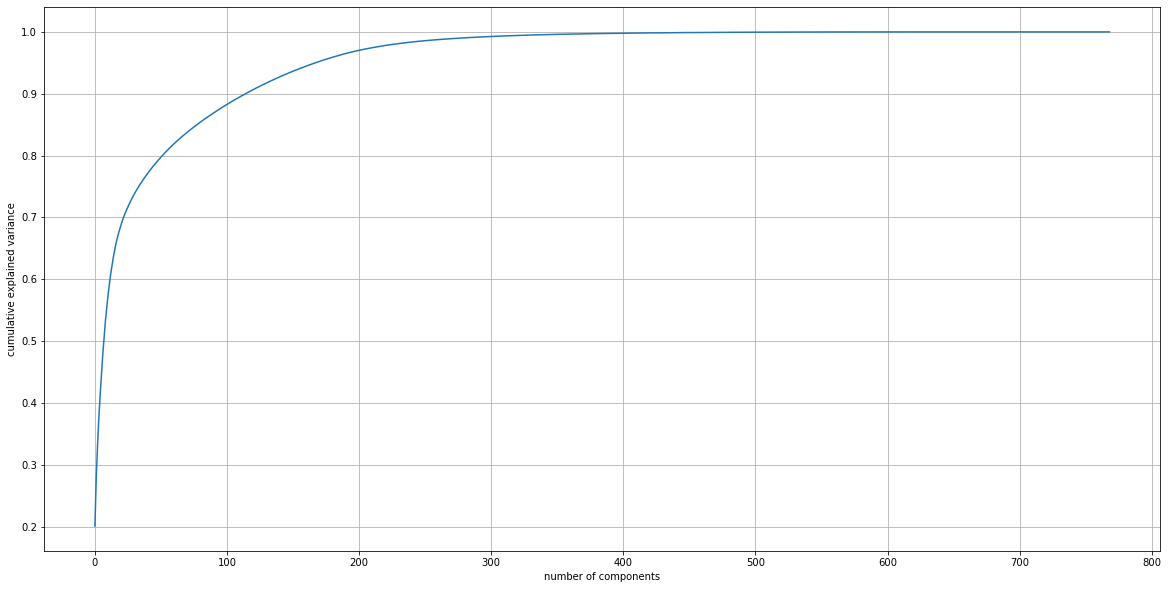

In [151]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [152]:
pca = PCA(n_components=100)
pca.fit(extracted_features_cleaned_std)

PCA(n_components=100)

In [153]:
scores_pca = pca.transform(extracted_features_cleaned_std)

In [175]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters=i) 
    km.fit(scores_pca)
    wcss.append(km.inertia_)

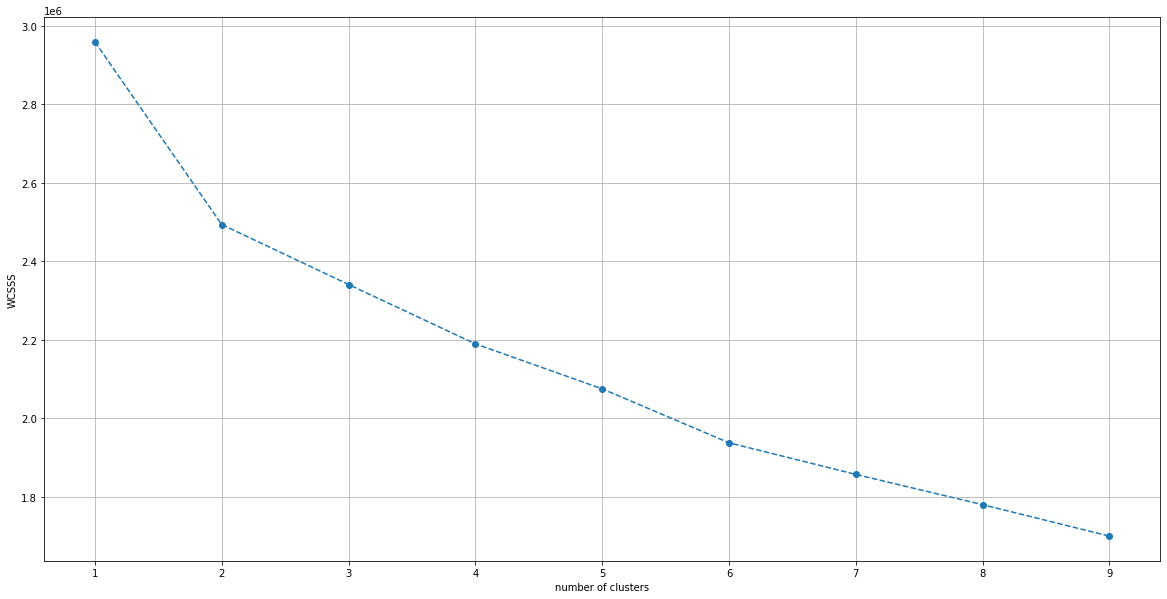

In [176]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('WCSSS');

In [177]:
km = KMeans(
    n_clusters=2
)
pca_km = km.fit_predict(scores_pca)
np.unique(pca_km,return_counts=True)

(array([0, 1], dtype=int32), array([4558,   47]))

In [178]:
df_final['timestamp'] = df_final['timestamp'].str[:10]
df_final.head()

,StockCode,timestamp,target_value
0,10002,2009-12-01,12.0
1,10080,2009-12-01,0.0
2,10109,2009-12-01,0.0
3,10120,2009-12-01,60.0
4,10125,2009-12-01,5.0


### Train - Hold-out Split

Hold-out set offers a way for verifying model performance on unseen data. With this dataset, we are looking to forecast a week out (Forecast Horizon = 1 Week) and therefore leave out a week worth of data out from the TTS as holdout set.

In [161]:
min(df_final['timestamp']), max(df_final['timestamp'])

('2009-12-01', '2010-12-09')

In [162]:
df_train = df_final[df_final['timestamp'] < '2010-12-03']
df_test = df_final[df_final['timestamp'] > '2010-12-02']

df_final.shape, df_train.shape, df_test.shape

((1722270, 3), (1690035, 3), (32235, 3))

In [164]:
# verify that we have adequate coverage across train and test
df_final.StockCode.nunique(), df_train.StockCode.nunique(), df_test.StockCode.nunique()

(4605, 4605, 4605)

## Split data into clusters

In [166]:
# lookup dataframe with item_ids and corresponding labels
df_lbl = pd.DataFrame()
extracted_features_cleaned['StockCode']=extracted_features_cleaned.index
df_lbl['StockCode'] = extracted_features_cleaned['StockCode']
df_lbl['label'] = pca_km

df_lbl.shape, df_lbl.dtypes

((4605, 2),
 StockCode    object
 label         int32
 dtype: object)

In [167]:
# merge labels back to the TTS
df_mrg = df_train.merge(df_lbl, how='left')
df_mrg_test = df_test.merge(df_lbl, how='left')

print(df_mrg.shape, df_train.shape)
print(df_mrg_test.shape, df_test.shape)

(1690035, 4) (1690035, 3)
(32235, 4) (32235, 3)


In [169]:
df_mrg.sample(5)

,StockCode,timestamp,target_value,label
264690,35961,2010-01-27,28.0,0
984832,84926D,2010-07-02,0.0,0
513889,85043,2010-03-22,0.0,0
390025,35916C,2010-02-23,0.0,0
1057066,84396,2010-07-18,0.0,0


In [170]:
# create required directory structure
dir_paths = ['./train', './train/cls_01_TSF', './train/cls_02_TSF']

for dir_path in dir_paths:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

In [171]:
# split and save TTS
record_count = 0
N_CLUSTERS=2
for i in range(N_CLUSTERS):
    df_tmp = df_mrg[['StockCode', 'timestamp', 'target_value']][df_mrg['label']==i]
    df_tmp.to_csv(f"./train/cls_0{i+1}_TSF/tts_{i+1}_TSF.csv", header=None, index=None)
    df_tmp2 = df_mrg_test[['StockCode', 'timestamp', 'target_value']][df_mrg_test['label']==i]
    df_tmp2.to_csv(f"./train/cls_0{i+1}_TSF/test_{i+1}_TSF.csv", header=None, index=None)
    record_count += df_tmp.shape[0]
    
print(record_count, df_mrg.shape[0])  # verify that all time series are retained

1690035 1690035
